In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

In [3]:
bankdata = pd.read_csv("bank-full.csv") # read file
bankdata.head() # observe first 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdata.shape

(45211, 17)

In [5]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# removing columns that do not make sense
del bankdata['poutcome']

In [8]:
# removing columns that do not make sense
del bankdata['month']

In [9]:
bankdata['education'] = bankdata['education'].replace(['unknown'],'primary') # changing unknown to primary

In [10]:
bankdata['pdays'] = bankdata['pdays'].replace([-1],1) # flipping the sign negative to positive for pdays

In [11]:
bankdata['contact'] = bankdata['contact'].replace(['unknown'],'telephone') # changing unknown to telephone

In [12]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,telephone,5,261,1,1,0,no
1,44,technician,single,secondary,no,29,yes,no,telephone,5,151,1,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,5,76,1,1,0,no
3,47,blue-collar,married,primary,no,1506,yes,no,telephone,5,92,1,1,0,no
4,33,unknown,single,primary,no,1,no,no,telephone,5,198,1,1,0,no


In [13]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

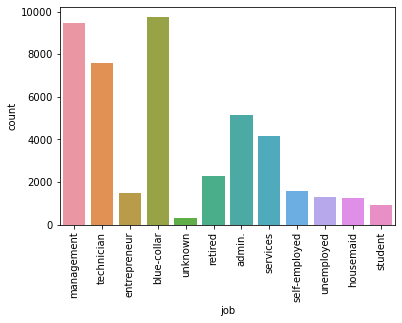

In [14]:
sns.countplot(bankdata['job'])
plt.xticks(rotation=90) # to rotate labels of x-axis

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

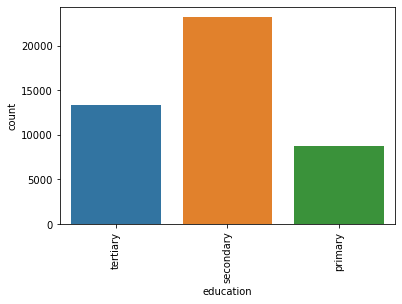

In [15]:
sns.countplot(bankdata['education'])
plt.xticks(rotation=90) # to rotate labels of x-axis

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

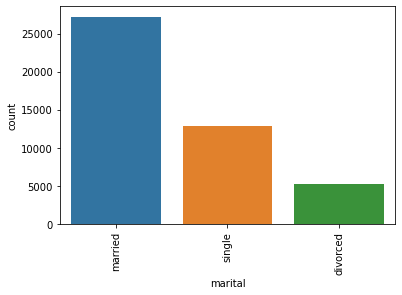

In [16]:
sns.countplot(bankdata['marital'])
plt.xticks(rotation=90) # to rotate labels of x-axis

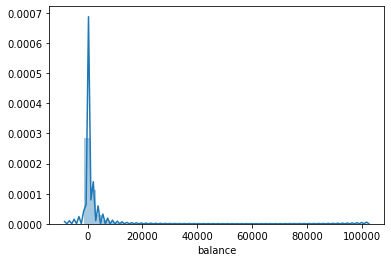

In [17]:
sns.distplot(bankdata['balance']) # left leaning; scewed right. most balances are well below 10k

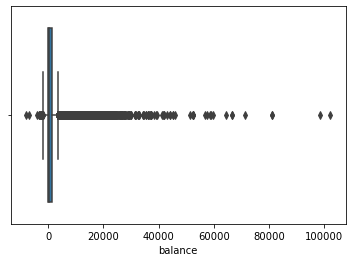

In [18]:
sns.boxplot(x=bankdata['balance'])

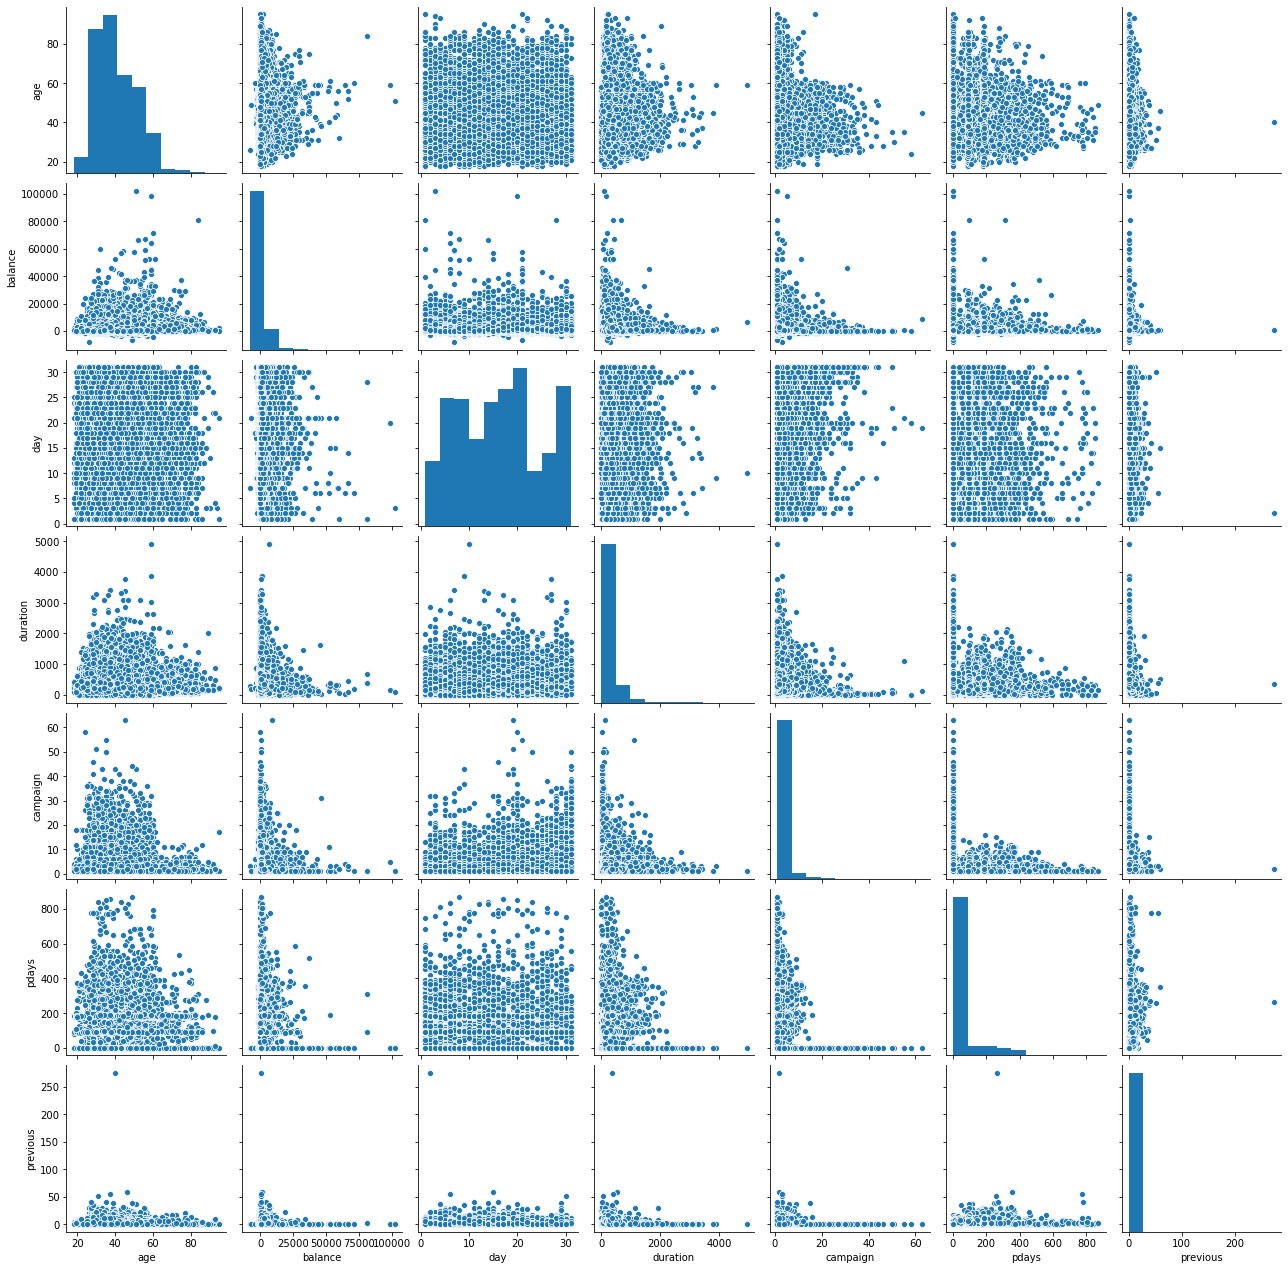

In [19]:
sns.pairplot(bankdata)

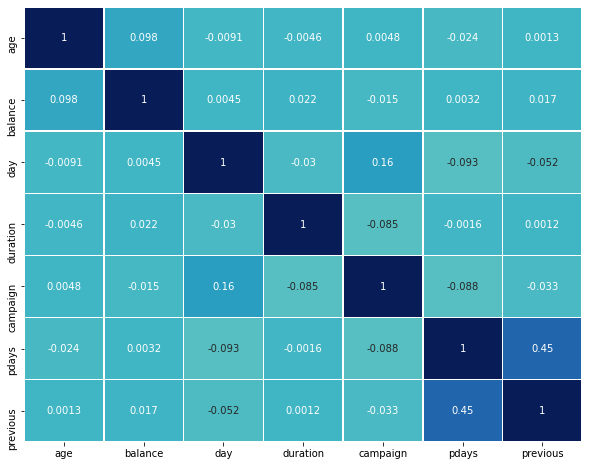

In [20]:
# check the relationship between different variables
plt.figure(figsize=(10,8))
sns.heatmap(bankdata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [21]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [22]:
bankdata.head() # view results

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,telephone,5,261,1,1,0,no
1,44,technician,single,secondary,no,29,yes,no,telephone,5,151,1,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,5,76,1,1,0,no
3,47,blue-collar,married,primary,no,1506,yes,no,telephone,5,92,1,1,0,no
4,33,unknown,single,primary,no,1,no,no,telephone,5,198,1,1,0,no


In [23]:
# need to convert object data types into categorical variables
for feature in bankdata.columns: # Loops through all columns
    if bankdata[feature].dtype == 'object': # check for columns with categorical strings
        bankdata[feature] = pd.Categorical(bankdata[feature])# replace strings with an integer
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,telephone,5,261,1,1,0,no
1,44,technician,single,secondary,no,29,yes,no,telephone,5,151,1,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,5,76,1,1,0,no
3,47,blue-collar,married,primary,no,1506,yes,no,telephone,5,92,1,1,0,no
4,33,unknown,single,primary,no,1,no,no,telephone,5,198,1,1,0,no


In [24]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  duration   45211 non-null  int64   
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  Target     45211 non-null  category
dtypes: category(8), int64(7)
memory usage: 2.8 MB


In [25]:
# replacing strings with int and one hot encoding others
replaceStruct = {
                  #"age": {"18-36": 1, "37-55": 2, "56-74": 3, "75-95": 4},
                  "marital":     {"single": 1, "married": 2 ,"divorced": 3},
                  "education": {"unknown": 0, "primary": 1, "secondary":2 , "tertiary": 3},
                  "default":     {"no": 0, "yes": 1 },               
                  "housing":     {"no": 0, "yes": 1 },
                  "loan":     {"no": 0, "yes": 1 },
                  "contact": {"cellular": 1, "telephone":2},
                  "Target":     {"no": 0, "yes": 1 } 
                 }
oneHotCols=["job"]

In [26]:
# replace and view
bankdata=bankdata.replace(replaceStruct)
bankdata=pd.get_dummies(bankdata, columns=oneHotCols)
bankdata.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,2,3,0,2143,1,0,2,5,261,...,0,0,1,0,0,0,0,0,0,0
1,44,1,2,0,29,1,0,2,5,151,...,0,0,0,0,0,0,0,1,0,0
2,33,2,2,0,2,1,1,2,5,76,...,1,0,0,0,0,0,0,0,0,0
3,47,2,1,0,1506,1,0,2,5,92,...,0,0,0,0,0,0,0,0,0,0
4,33,1,1,0,1,0,0,2,5,198,...,0,0,0,0,0,0,0,0,0,1


In [27]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   marital            45211 non-null  int64
 2   education          45211 non-null  int64
 3   default            45211 non-null  int64
 4   balance            45211 non-null  int64
 5   housing            45211 non-null  int64
 6   loan               45211 non-null  int64
 7   contact            45211 non-null  int64
 8   day                45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  Target             45211 non-null  int64
 14  job_admin.         45211 non-null  uint8
 15  job_blue-collar    45211 non-null  uint8
 16  job_entrepreneur   45211 non-null  uint8
 17  job_housemai

In [28]:
# prep for data split
X = bankdata.drop("education",axis=1)
y = bankdata.pop("education")

In [29]:
# split data test size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [30]:
# build model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [31]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.5826452373930994


In [33]:
train_char_label = ['1', '2', '3']
Bank_Tree_File = open('bankdata_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_File.close()

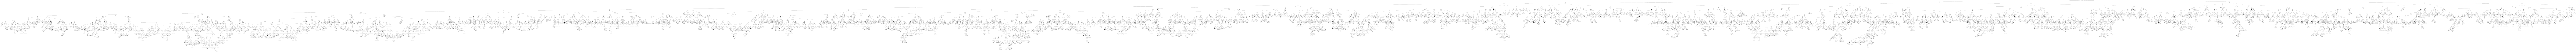

In [34]:
retCode = system("dot -Tpng bankdata_tree.dot -o bank_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bank_tree.png"))


In [35]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.6778525610642399
0.6717045119433795


In [38]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.041134
marital            0.000000
default            0.000000
balance            0.000768
housing            0.000000
loan               0.000000
contact            0.003266
day                0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
Target             0.000000
job_admin.         0.000000
job_blue-collar    0.120829
job_entrepreneur   0.000000
job_housemaid      0.050983
job_management     0.783020
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000


In [39]:
Print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","2","3"]],
                  columns = [i for i in ["1","2","3"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

NameError: name 'Print' is not defined